In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
df=pd.read_csv("google_review_ratings.csv")
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
df.shape

(5456, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [5]:
df.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [6]:
[i for i in df.columns if df[i].isnull().sum()>0]

['Category 12', 'Category 24', 'Unnamed: 25']

In [7]:
df.drop(df[df["Category 11"] == "2\t2."].index , axis=0 , inplace=True)
df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [8]:
df = df[df["Category 12"].notna()]
df = df[df["Category 24"].notna()]
df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [9]:
df.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       0
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       0
Unnamed: 25    5454
dtype: int64

In [10]:
df.drop("Unnamed: 25",axis=1,inplace=True)
df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5454 non-null   object 
 1   Category 1   5454 non-null   float64
 2   Category 2   5454 non-null   float64
 3   Category 3   5454 non-null   float64
 4   Category 4   5454 non-null   float64
 5   Category 5   5454 non-null   float64
 6   Category 6   5454 non-null   float64
 7   Category 7   5454 non-null   float64
 8   Category 8   5454 non-null   float64
 9   Category 9   5454 non-null   float64
 10  Category 10  5454 non-null   float64
 11  Category 11  5454 non-null   object 
 12  Category 12  5454 non-null   float64
 13  Category 13  5454 non-null   float64
 14  Category 14  5454 non-null   float64
 15  Category 15  5454 non-null   float64
 16  Category 16  5454 non-null   float64
 17  Category 17  5454 non-null   float64
 18  Category 18  5454 non-null   float64
 19  Catego

In [12]:
df["Category 11"]=df["Category 11"].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5454 non-null   object 
 1   Category 1   5454 non-null   float64
 2   Category 2   5454 non-null   float64
 3   Category 3   5454 non-null   float64
 4   Category 4   5454 non-null   float64
 5   Category 5   5454 non-null   float64
 6   Category 6   5454 non-null   float64
 7   Category 7   5454 non-null   float64
 8   Category 8   5454 non-null   float64
 9   Category 9   5454 non-null   float64
 10  Category 10  5454 non-null   float64
 11  Category 11  5454 non-null   float64
 12  Category 12  5454 non-null   float64
 13  Category 13  5454 non-null   float64
 14  Category 14  5454 non-null   float64
 15  Category 15  5454 non-null   float64
 16  Category 16  5454 non-null   float64
 17  Category 17  5454 non-null   float64
 18  Category 18  5454 non-null   float64
 19  Catego

In [13]:
df.drop("User",axis=1,inplace=True)
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [14]:
df.columns=["Church Rating","Resort Rating","Beach Rating","Park Rating","Theatre Rating","Museum Rating","Mall Rating","Zoo Rating","Restaurant Rating","Pub/Bar Rating","Local Service Rating","Burger/Pizza Shop Rating","Hotel/Lodging Rating","Juice Bar Rating","Art Gallery Rating","Dance Club Rating","Swimming Pool Rating","Gym Rating","Bakery Rating","Spa Rating","Cafe Rating","Viewpoint Rating","Monument Rating","Garden Rating"]

In [15]:
df

,Church Rating,Resort Rating,Beach Rating,Park Rating,Theatre Rating,Museum Rating,Mall Rating,Zoo Rating,Restaurant Rating,Pub/Bar Rating,...,Art Gallery Rating,Dance Club Rating,Swimming Pool Rating,Gym Rating,Bakery Rating,Spa Rating,Cafe Rating,Viewpoint Rating,Monument Rating,Garden Rating
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Church Rating             5454 non-null   float64
 1   Resort Rating             5454 non-null   float64
 2   Beach Rating              5454 non-null   float64
 3   Park Rating               5454 non-null   float64
 4   Theatre Rating            5454 non-null   float64
 5   Museum Rating             5454 non-null   float64
 6   Mall Rating               5454 non-null   float64
 7   Zoo Rating                5454 non-null   float64
 8   Restaurant Rating         5454 non-null   float64
 9   Pub/Bar Rating            5454 non-null   float64
 10  Local Service Rating      5454 non-null   float64
 11  Burger/Pizza Shop Rating  5454 non-null   float64
 12  Hotel/Lodging Rating      5454 non-null   float64
 13  Juice Bar Rating          5454 non-null   float64
 14  Art Gall

In [18]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Church Rating,Resort Rating,Beach Rating,Park Rating,Theatre Rating,Museum Rating,Mall Rating,Zoo Rating,Restaurant Rating,Pub/Bar Rating,...,Art Gallery Rating,Dance Club Rating,Swimming Pool Rating,Gym Rating,Bakery Rating,Spa Rating,Cafe Rating,Viewpoint Rating,Monument Rating,Garden Rating
0,0.0,0.000000,0.333580,0.335418,0.459476,0.268334,0.459476,0.215954,0.214116,0.242603,...,0.159898,0.054218,0.045948,0.0,0.045948,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.331487,0.333313,0.456593,0.266651,0.456593,0.241081,0.212773,0.241995,...,0.158895,0.053878,0.045659,0.0,0.045659,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,...,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0
3,0.0,0.045907,0.333288,0.333288,0.459075,0.268100,0.459075,0.215765,0.213929,0.242391,...,0.159758,0.054171,0.045907,0.0,0.045907,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,...,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0


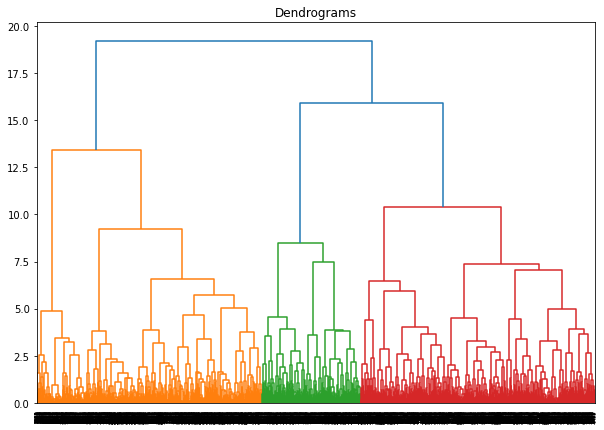

In [19]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

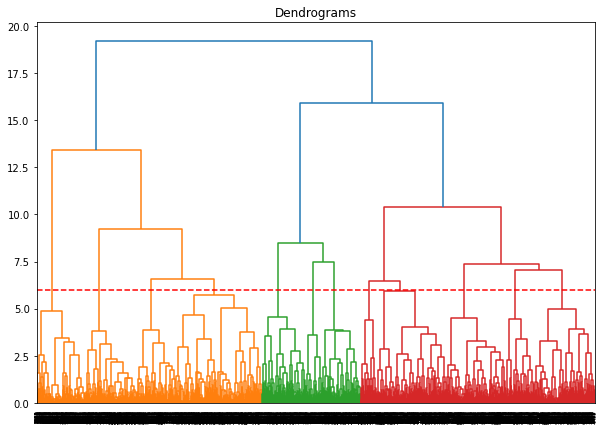

In [63]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [124]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

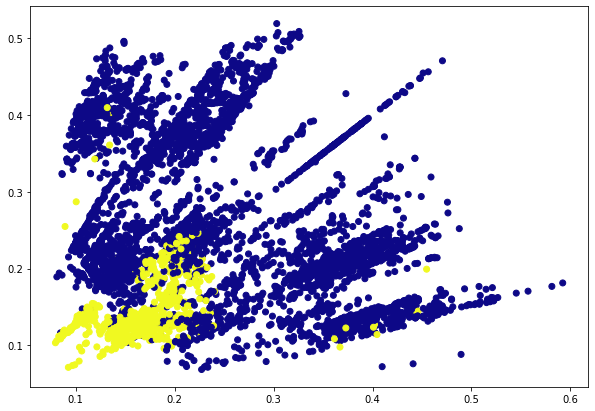

In [125]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled["Theatre Rating"], data_scaled["Restaurant Rating"], c=cluster.labels_,cmap='plasma') 

In [123]:
df['labels']=cluster.labels_
df

,Church Rating,Resort Rating,Beach Rating,Park Rating,Theatre Rating,Museum Rating,Mall Rating,Zoo Rating,Restaurant Rating,Pub/Bar Rating,...,Dance Club Rating,Swimming Pool Rating,Gym Rating,Bakery Rating,Spa Rating,Cafe Rating,Viewpoint Rating,Monument Rating,Garden Rating,labels
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,2
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,2
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,2
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,2
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,2
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,2
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,2
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,2
